In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('corona.csv')

In [3]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


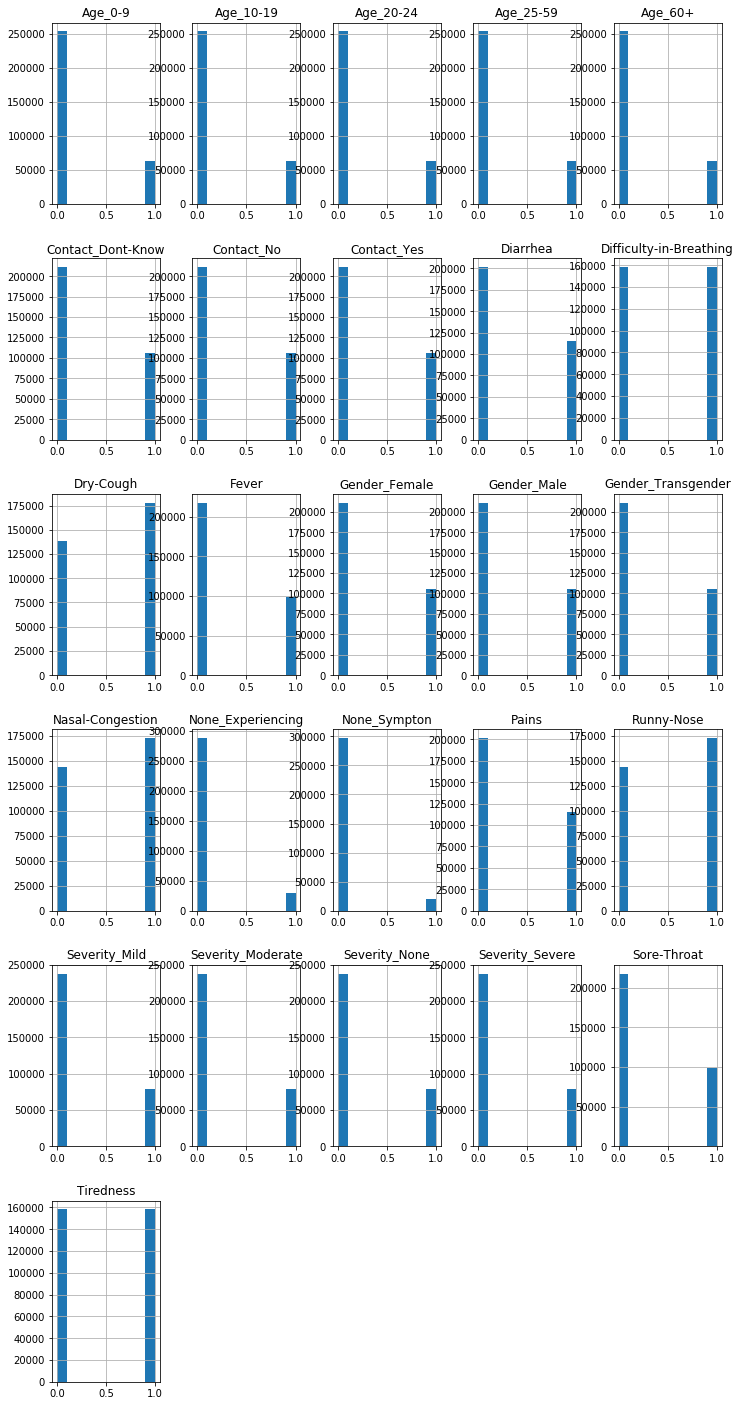

In [4]:
df.hist(figsize = (12, 25))
plt.show()

In [6]:
good = df[df['Severity_Severe']==0]
bad = df[df['Severity_Severe']==1]

outlier_fraction = len(bad)/float(len(good))
outlier_fraction

0.3333333333333333

In [7]:
print("No. of normal : {}".format(len(good)))
print("No. of anomaly : {}".format(len(bad)))

No. of normal : 237600
No. of anomaly : 79200


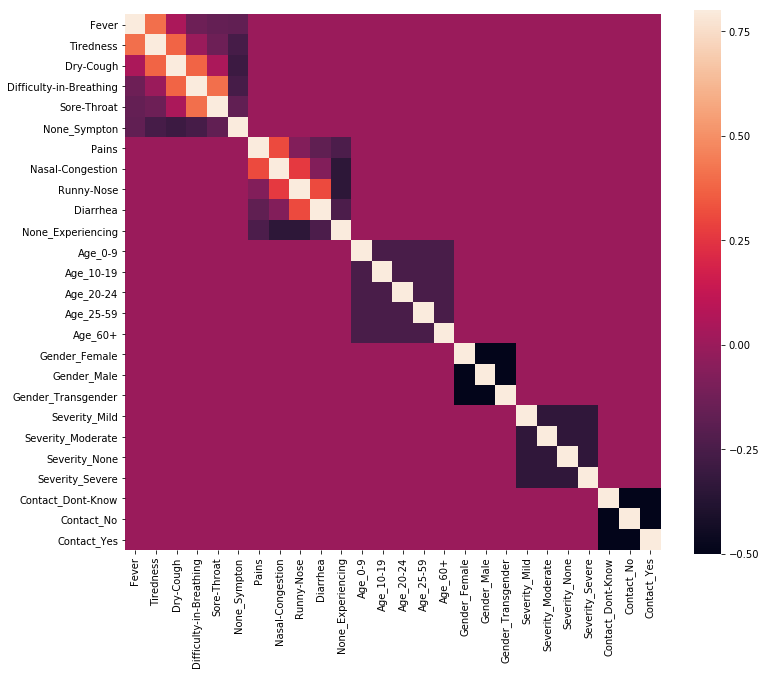

In [8]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [9]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['Severity_Severe']]
target = 'Severity_Severe'

In [10]:
X = df[columns]
y = df[target]
print(X.shape)
print(y.shape)

(316800, 25)
(316800,)


In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [12]:
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = 1 ),
    "Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction )
}
#fiting the data into different model and predicting the output 
n_outlier = len(bad)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    print('{}: {}'.format(clf_name, n_errors))
    print('Accuracy Score : {}'.format(accuracy_score(y, y_pred)))
    print((classification_report(y, y_pred)))

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 177080
Accuracy Score : 0.44103535353535356
              precision    recall  f1-score   support

           0       0.64      0.57      0.61    237600
           1       0.04      0.05      0.04     79200

   micro avg       0.44      0.44      0.44    316800
   macro avg       0.34      0.31      0.32    316800
weighted avg       0.49      0.44      0.46    316800

Local Outlier Factor: 79100
Accuracy Score : 0.7503156565656566
              precision    recall  f1-score   support

           0       0.75      1.00      0.86    237600
           1       0.56      0.01      0.01     79200

   micro avg       0.75      0.75      0.75    316800
   macro avg       0.66      0.50      0.43    316800
weighted avg       0.70      0.75      0.65    316800

